# Exploration des données de plaque assay (Données de Juliette)

La matrice d'interaction a été générée à partir de 98 souches bactériennes et 128 bactériophages.

1. Identifier les plus $k$ souches les plus similaires (au sens de la distance de Hamming) de la souche d'intérêt.
2. Prendre l'union des phages qui infectent ces $k$ bactéries, et les classer par importance (en fonction de la fréquence d'infections sur ce $k$-échantillon).
3. Recommander les $n$ phages les plus importants pour traiter cette bactérie.

*Évaluation* : On le fait pour toutes les souches du jeu d'évaluation.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import shutil

sns.set_theme()

np.random.seed(0)

In [3]:
#### Enter your working directory here ####
os.chdir("D:\Documents\Thèse\Aude Bernheim - INSERM\Projet_Coli\exploration_data_juliette")

### Build an analysis directory where we store the results
analysis_path = "./analysis/"
if os.path.isdir(analysis_path):
    print("Removing previous analysis folder.")
    shutil.rmtree(analysis_path)
os.mkdir(analysis_path)

### Load the data samples
bact_features = pd.read_csv("Coli_system.csv", sep=";", index_col="Strain")
interact_matrix = pd.read_csv("Spot_Test_repl1bis.csv", sep=";", index_col="Strain")

Removing previous analysis folder.


In [4]:
### Data preprocessing

# Fill NAs with 0
interact_matrix = interact_matrix.fillna(0)

# Clean the dataframes : remove strains which doesn't exist in bact_features
removed = []
for strain, row in interact_matrix.iterrows():
    if  not (strain in bact_features.index):
        interact_matrix = interact_matrix.drop(strain)
        removed.append(strain)
print(f"Removed {removed} strains from the experiment.")

print(bact_features.shape)
print(interact_matrix.shape)
interact_matrix.head()

Removed ['911A', 'B11I13', 'B1931', 'C1-119', 'CIP107988T', 'colF11g', 'E1416', 'E1491/ B156', 'E1348-69', 'E4961', 'EC6130', 'ECOR-72', 'H1-001-0017-S-G', 'H1-001-0115-B-M', 'H1-001-0064-E-M', 'H441', 'S1-1', 'VDG417'] strains from the experiment.
(355, 57)
(80, 128)


,409_P1,409_P1.1,409_P3,409_P5,409_P6,409_P7,409_P8,409_P9,411_P1,411_P1.1,...,NRG 1A1,NRG 1A1.1,NRG 3A1,NRG 3B1,NRG 5A1B,NRG 8A1,NRG 9A1,NRG 9B1B,T4,T7
Strain,,,,,,,,,,,,,,,,,,,,,
370D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
381A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AN03,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASP51g,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


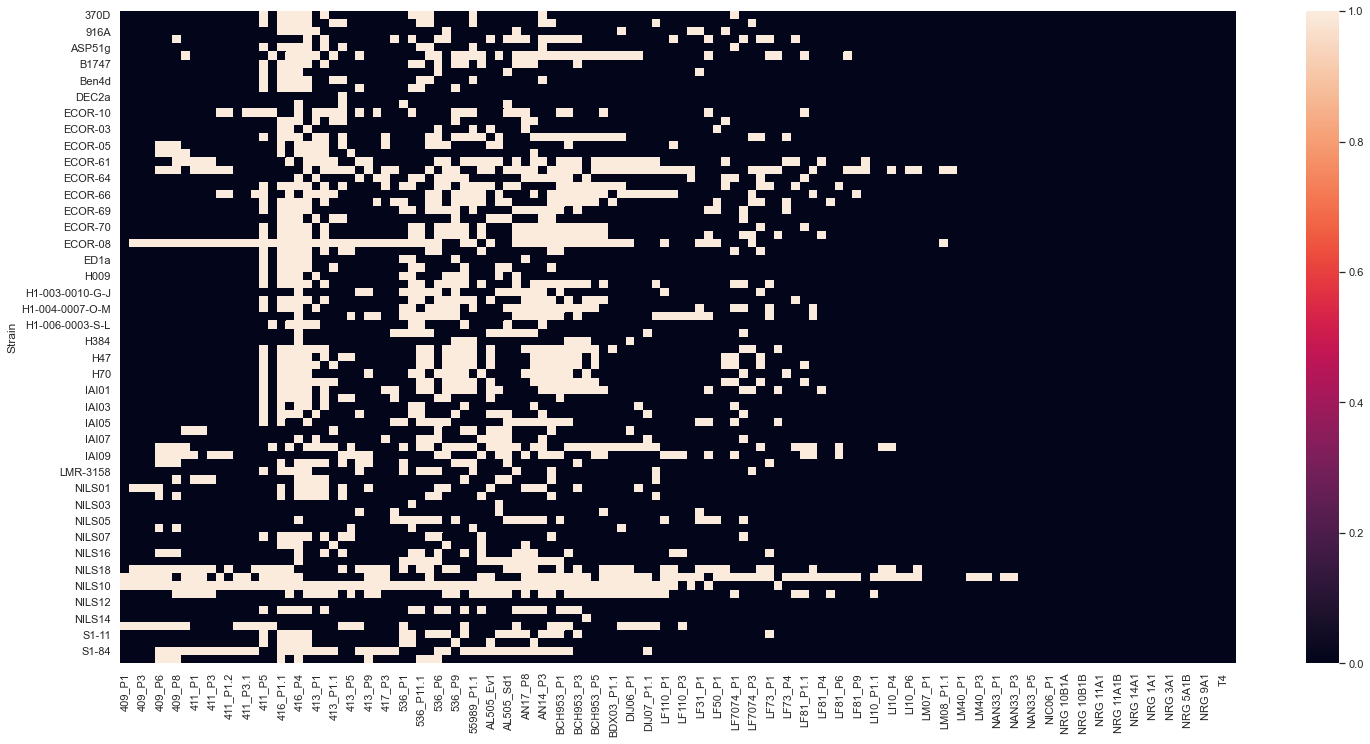

In [5]:
### Visualize the interaction matrix in a heatmap
fig, ax = plt.subplots(1, 1, figsize=(25, 12))
sns.heatmap(interact_matrix, ax=ax)

plt.savefig("./analysis/interaction_matrix.pdf", format="pdf")

In [6]:
### Train-test split : 60 in the train set and the rest in the test set
interact_matrix_shuffled = interact_matrix.sample(frac=1)
X_train, X_test = interact_matrix_shuffled[:60], interact_matrix_shuffled[60:]
train_features, test_features = bact_features.loc[X_train.index].drop(["Clade", "Pathotype", "O_type_genome"], axis=1), bact_features.loc[X_test.index].drop(["Clade", "Pathotype", "O_type_genome"], axis=1)

print(X_train.shape, X_test.shape)
print(train_features.shape, test_features.shape)
print(X_train.index, X_test.index)

(60, 128) (20, 128)
(60, 54) (20, 54)
Index(['IAI05', 'ECOR-71', 'ED1a', 'S1-76', 'H95', 'NILS11', 'NILS16',
       'NILS18', 'IAI03', 'NILS19', 'H384', 'NILS06', '916A', 'NILS12',
       'IAI07', 'H1-003-0010-G-J', 'AN03', 'ECOR-66', 'B6A1', 'ECOR-70', 'H47',
       'H1-006-0003-S-L', 'H4', 'S1-109', 'IAI10', 'ECOR-06', 'NILS03',
       'NILS05', 'B1747', 'LMR-3158', 'NILS13', 'ASP51g', 'H1-001-0093-R-A',
       'IAI08', 'ECOR-08', 'ECOR-01', 'M863', 'ECOR-67', 'DEC2a', 'EDL933',
       'H48', 'NILS04', '381A', 'H009', 'NILS15', 'ECOR-03', 'IAI09',
       'ECOR-63', 'ECOR-09', 'IAI04', 'ECOR-69', 'H1-003-0019-B-M', 'ECOR-61',
       '370D', 'S1-84', 'ECOR-04', 'ATCC35469T', 'NILS02', 'ECOR-05', 'IAI06'],
      dtype='object', name='Strain') Index(['ECOR-64', 'NILS14', 'Ben4d', 'ECOR-02', 'ECOR-07', 'H1-005-0058-M-A',
       'IAI01', 'H14', 'NILS08', 'NILS01', 'ECOR-10', 'NILS10',
       'H1-004-0007-O-M', 'ECOR-65', 'DEC1a', 'S1-11', 'NILS17', 'NILS07',
       'IAI02', 'H70'],
      d

## 1. Find the $k$ most similar bacteria
For each bacterium in the Test Set, find the $k$ most similar in the train set.

```most_similar_bacteria``` is a dataframe with each strain, and the corresponding $k$ most similar bacteria.

*Warning* : in the data, the RM systems are gathered in a single cell, which is not very coherent with the use of the Hamming distance. More generally, how to compute a distance between bacteria in this system ? Since a difference regarding one defence system may cause dramatic differences in the results (nonlinearity property).

In [7]:
def hamming(x, y):
    """
    Hamming distance between binary vectors.
    x (np.array): binary vector
    y (np.array): binary vector
    """
    return np.sum(np.abs(x - y))

similar_bacteria, k = [], 10
for strain, row in X_test.iterrows():
    features = test_features.loc[strain]  # retrieve the features corresponding to this bact
    similars = {}
    for train_strain, train_feat in train_features.iterrows(): # compare to each train strain features
        ham_dist = hamming(features.to_numpy(), train_feat.to_numpy())
        similars[train_strain] = ham_dist
    sorted_similars = sorted(similars.items(), key=lambda x: x[1], reverse=False)
    
    k_nearest = {}  # build the dataframe with {strain, closest#0, closest#1, ..., closest#k}
    k_nearest["Strain"] = strain
    for i, elt in enumerate(sorted_similars[:k]):
        k_nearest[i] = elt[0]  #  get the k nearest bacteria
    similar_bacteria.append(k_nearest)

most_similar_bacteria = pd.DataFrame(similar_bacteria).set_index("Strain")
most_similar_bacteria.to_csv("./analysis/1_k_nearest_bacteria_k10.csv", sep=";")

## 2. Rank the phages according to their infection frequency in the $k$-sample

Build a dataframe (```strain```, ```phages```) with the proportion of the $k$-nearest bacteria of ```strain``` which were infected by ```phage```. 

In [8]:
# initialize the dataframe of (strain, phages) with 0s
phages_incidences = pd.DataFrame(0, index=X_test.index, columns=X_test.columns)

for strain, row in most_similar_bacteria.iterrows():  # iterate in the k-nearest dataframe
    
    for similar in row: 
        phages = interact_matrix.loc[similar]
        
        for phi, did_infect in phages.iteritems():
            if did_infect:
                phages_incidences.loc[strain, phi] += 1

phages_incidences = phages_incidences.apply(lambda x: x / k)  # divide by the number of most similar bacteria
phages_incidences.to_csv("./analysis/2_phage_incidence_in_closest_bacteria_k10.csv", sep=";")

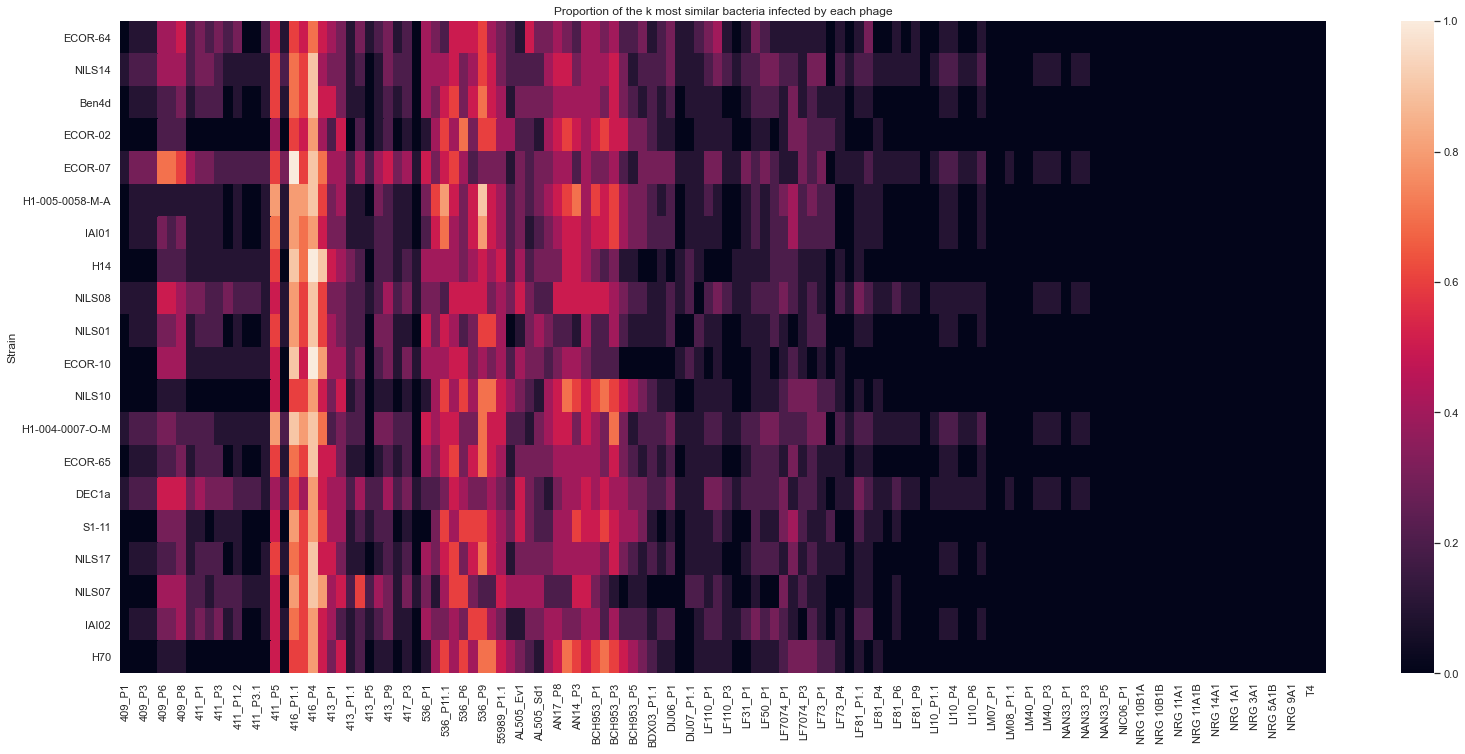

In [15]:
### Visualize the phage incidence in a heatmap
fig, ax = plt.subplots(1, 1, figsize=(27, 12))
sns.heatmap(phages_incidences, ax=ax)
ax.set_title("Proportion of the k most similar bacteria infected by each phage")

plt.savefig("./analysis/phages_incidences.pdf", format="pdf")

NB : On dirait que tous les phages qui n'infectent pas sont classés à droite de la matrice. Ce n'est pas le cas (après vérification dans interact_matrix.csv), les phages sont rangés par ordre alphabétique, mais effectivement ceux de fin d'alphabet semblent moins infecter les bactéries.

## 3. Take the $n$ most frequent phages

In [10]:
recommandations, n = [], 3

for strain, row in phages_incidences.iterrows():
    row_sorted = row.sort_values(ascending=False)
    
    recomm_strain = {"Strain": strain}
    for i in range(n):
        if row_sorted[i] != 0.0:
            recomm_strain[f"Recommandation#{i}"] = row_sorted.index[i]
        else:
            recomm_strain[f"Recommandation#{i}"] = np.nan
            break
    recommandations.append(recomm_strain)
    
recommandations = pd.DataFrame(recommandations).set_index("Strain")

recommandations.to_csv("./analysis/3_phage_treatment_recommandations_k10.csv", sep=";")

In [11]:
print(recommandations.head())

        Recommandation#0 Recommandation#1 Recommandation#2
Strain                                                    
ECOR-64           416_P4           536_P9         416_P1.1
NILS14            416_P4         416_P1.1           411_P5
Ben4d             416_P4         416_P1.1           536_P9
ECOR-02           416_P4           536_P6         55989_P1
ECOR-07         416_P1.1           416_P4           416_P5


## 4. Evaluate the predictions

### 4.1. Evaluate the KNN approach

Here we don't evaluate:
- the importance of the order of the recommandations (TODO : choose proper evaluation metrics)
- the influence of $n$
- the possibility of improving the predictions using phages genomic features

...

In [12]:
precisions = []
verbose = 0

for strain, row in recommandations.iterrows():
    recom = set(row.to_numpy())
    exp_results = interact_matrix.loc[strain]
    gt = set(exp_results[exp_results == 1].index.to_numpy())

    success = set.intersection(recom, gt)
    
    if verbose != 0:
        print(f"{strain} :")
        print(f"Precision : {len(success)} / {n}")
        print(f"{success}")
        print("\n")
        
    precisions.append(len(success) / n)
    
precisions = np.array(precisions)
print(f"\nAverage prediction precision : {round(precisions.mean(), 2)}.")


Average prediction precision : 0.7.


### 4.2. Evaluate the random baseline
For each strain, pick three random phages and make the predictions.

In [13]:
rand_recommandations, n = [], 3

for strain, row in X_test.iterrows():
    
    recomm_strain = {"Strain": strain}
    for i, recom in enumerate(np.random.choice(row.index, size=n, replace=False)):
        recomm_strain[f"Recommandation #{i}"] = recom
    
    rand_recommandations.append(recomm_strain)
    
rand_recommandations = pd.DataFrame(rand_recommandations).set_index("Strain")

### Evaluate the random baseline
rand_precisions = []
verbose = 0

for strain, row in rand_recommandations.iterrows():
    recom = set(row.to_numpy())
    exp_results = interact_matrix.loc[strain]
    gt = set(exp_results[exp_results == 1].index.to_numpy())

    success = set.intersection(recom, gt)
    
    if verbose != 0:
        print(f"{strain} :")
        print(f"Precision : {len(success)} / {n}")
        print(f"{success}")
        print("\n")
        
    rand_precisions.append(len(success) / n)
    
rand_precisions = np.array(rand_precisions)
print(f"\nAverage prediction precision : {round(rand_precisions.mean(), 2)}.")


Average prediction precision : 0.2.


### 4.3. Naive baseline

The naive baseline consists in choosing the $n$ phages that had the largest incidence in the train dataset, and recommand them for all the phages in the test dataset, regardless of their genomic features.

In [14]:
naive_recommandations, n = [], 3

### Retrieve the n best phages in the train set
incidences = {}
for i, row in X_train.transpose().iterrows():
    strain = i
    incidences[strain] = row.sum(axis=0) / row.shape[0]
n_best_phages = sorted(incidences, key=lambda x: incidences[x], reverse=True)[:n]

### Always recommand the n best phages
for strain, row in X_test.iterrows():
    recomm_strain = {"Strain": strain}
    for i, recom in enumerate(n_best_phages):
        recomm_strain[f"Recommandation #{i}"] = recom
    naive_recommandations.append(recomm_strain)
naive_recommandations = pd.DataFrame(naive_recommandations).set_index("Strain")

### Evaluate the naive baseline
naive_precisions = []
verbose = 0

for strain, row in naive_recommandations.iterrows():
    recom = set(row.to_numpy())
    exp_results = interact_matrix.loc[strain]
    gt = set(exp_results[exp_results == 1].index.to_numpy())

    success = set.intersection(recom, gt)
    
    if verbose != 0:
        print(f"{strain} :")
        print(f"Precision : {len(success)} / {n}")
        print(f"{success}")
        print("\n")
        
    naive_precisions.append(len(success) / n)
    
naive_precisions = np.array(naive_precisions)
print(f"\nAverage prediction precision : {round(naive_precisions.mean(), 2)}.")


Average prediction precision : 0.72.
